In [1]:
import os
import h5py
import numpy as np
from matplotlib import pyplot as plt
import scipy as scipy
from scipy.signal import find_peaks
import matplotlib.image as mpimg

In [2]:
#path = "C:/Users/ashsm/Documents/Stanford/bruker_deeplabcut/20230130/20230130-ash-2023-04-03/videos/fly1-20sDLC_resnet50_20230130Apr3shuffle1_50000.h5"
#path = "C:/Users/ashsm/Documents/Stanford/bruker_deeplabcut/20230130/20230130-ash-2023-04-03/videos/10_53_03MJPG-0000DLC_resnet50_20230130Apr3shuffle1_360000.h5"
#path = "C:/Users/ashsm/Documents/Stanford/bruker_deeplabcut/bruker_training/bruker-ash-2023-05-03/videos/test_perDLC_resnet50_brukerMay3shuffle1_60000.h5"

##older model
path = "C:/Users/ashsm/Documents/Stanford/bruker_deeplabcut/tight_crop_vids/test_perDLC_resnet50_bruker_cropJun2shuffle1_10001.h5"
#the output is essentially x,y locations for each timestamp (and likelihoods)
#could just do a check to see if likelihoods are ok and then procede with analysis
#h5py file doesn't seem to have a header...but data is stored in ['df_with_missing']['table']

#could get header from csv or just input csv.It's not too big so its ok. Could restore in h5py with better organization

#ultimately look at xy for bodypart1 and bodypart2 (possibly rename in later labeling) 
# # and get eucl distance between them (do as array slicing like foraging code)
#bodyparts	bodypart1	bodypart1	bodypart1	bodypart2	bodypart2	bodypart2	bodypart3	bodypart3	bodypart3	objectA	objectA	objectA
#coords	x	y	likelihood	x	y	likelihood	x	y	likelihood	x	y	likelihood

# with h5py.File(path, 'r') as f:
#     print(f.keys())
#     index_i = np.array(f['df_with_missing']['_i_table']['index'])
#     abounds = np.array(f['df_with_missing']['_i_table']['index']['abounds'])
#     data = np.array(f['df_with_missing']['table'])

# print('hello', data[:][1])
# print(data.dtype)
# print(data[:]['values_block_0'][:,0]) ##this is the first column (head x)

def get_data_column(path, index):
    """takes path to h5 file and returns the column of data for specific index --- 
    must know the index for corresponding labeled data-may need to check csv because no header in h5 file"""
    with h5py.File(path, 'r') as f:
        data = np.array(f['df_with_missing']['table'])

        #this data is formatted weird. values block indicates the psuedo dict key toget to data part, 
        # then want every column
        specified_column = data[:]['values_block_0'][:,index]
        return specified_column

head_x = get_data_column(path, 0)
head_y = get_data_column(path, 1)
head_likelihood = get_data_column(path, 2)
proboscis_x = get_data_column(path, 3)
proboscis_y = get_data_column(path, 4)
proboscis_likelihood = get_data_column(path, 5)
extend_x = get_data_column(path, 6)
extend_y = get_data_column(path, 7)
extend_likelihood = get_data_column(path, 8)
neck_x = get_data_column(path, 9)
neck_y = get_data_column(path, 10)
neck_likelihood = get_data_column(path, 11)
## mid proboscis that *should* be labelled only when proboscis is out is index 6-8 (x,y,likelihood)

# scorer	DLC_resnet50_bruker_cropJun2shuffle1_10001	DLC_resnet50_bruker_cropJun2shuffle1_10001	DLC_resnet50_bruker_cropJun2shuffle1_10001	DLC_resnet50_bruker_cropJun2shuffle1_10001	DLC_resnet50_bruker_cropJun2shuffle1_10001	DLC_resnet50_bruker_cropJun2shuffle1_10001	DLC_resnet50_bruker_cropJun2shuffle1_10001	DLC_resnet50_bruker_cropJun2shuffle1_10001	DLC_resnet50_bruker_cropJun2shuffle1_10001	DLC_resnet50_bruker_cropJun2shuffle1_10001	DLC_resnet50_bruker_cropJun2shuffle1_10001	DLC_resnet50_bruker_cropJun2shuffle1_10001
# bodyparts	head	head	head	proboscis_tip	proboscis_tip	proboscis_tip	extended	extended	extended	neck	neck	neck





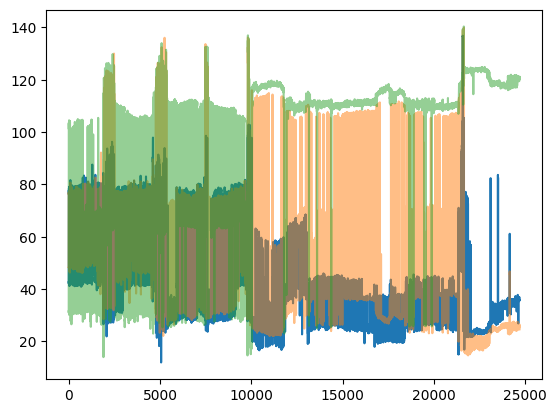

In [12]:
## plot difference between head and proboscis

difference = np.sqrt((head_x - proboscis_x)**2 + (head_y - proboscis_y)**2)
neck_diff = np.sqrt((neck_x - proboscis_x)**2 + (neck_y - proboscis_y)**2)
ext_diff = np.sqrt((extend_x - proboscis_x)**2 + (extend_y - proboscis_y)**2)
plt.plot(difference)
plt.plot(neck_diff, alpha = .5)
plt.plot(ext_diff, alpha = .5)

##now need to decide if this is real... and if the magnitude is reflective of actual PER being bigger
##import roi data and compare
#and run scipy peaks on it

In [ ]:
# ## path to ROI calc peaks
# path_roi = "C:/Users/ashsm/OneDrive/Documents/Stanford/Bruker behavior/20230130/scipy/ideo_fly1-20s_frames_python_peaks.h5"
# with h5py.File(path_roi, 'r') as f:
#     print(f.keys())
#     #PER_peaks = np.array(f['PER peaks'])
#     PER_peaks = f['PER peaks'][()]
#     raw_PER = f['raw PER'][()]
#     PER_onsets = f['PER onsets'][()]
# print(np.shape(PER_peaks))
# print(PER_peaks[0])
# plt.scatter(PER_peaks[0], np.ones(len(PER_peaks[0]))*40, color = 'orange', s = 20)
# plt.plot(difference, alpha = .5)
# plt.xlim(0,10000)

# plt.show()

In [ ]:
# def get_peaks(data):
#     """	data = one flies worth of raw data, 
#     returns list of list of peaks for light and PER where light and PER have different scipy requirements"""

#     #1. get mean column indices and mean titles
#     mean_indices = get_mean_indices(data)
#     mean_titles = get_mean_titles(data)

#     #2. find peaks
#     all_peaks= []
#     columns = [] #needed for boolean onsets later
#     for mean_index in range(len(mean_indices)):
#         single_column = get_means(data, mean_indices[mean_index])
#         #to get each element out of their own array and into one array with all elements
#         squeeze_column = np.squeeze(single_column) 
#         if is_column_light(mean_titles, 0, mean_index) or 'diode' in mean_titles[0][0]:
#             print('light')
#             #peaks, _ = scipy.signal.find_peaks(squeeze_column, prominence = .5)
#             columns.append(single_column)
#             ##modification for noisy diode data
#             light_median = np.median(single_column, axis = 0)
#             early_light_max = max(single_column[0:2000])
#             #peaks, _ = scipy.signal.find_peaks(squeeze_column, height = light_median[0], prominence = .3, distance = 10)
#             peaks, properties = scipy.signal.find_peaks(squeeze_column, height = early_light_max +.001, prominence = .1, distance = 10)
            
#         else:
#             print('PER')
#             peaks, properties = scipy.signal.find_peaks(squeeze_column*-1, prominence = 3, distance = 15) 
#             columns.append(single_column)
#             #distance is req frames between peaks
#         all_peaks.append(peaks)
#     return all_peaks, properties, columns


# ## way for ROIS  
# #PER_peaks, PER_peak_properties, PER_columns = get_peaks(data)

147


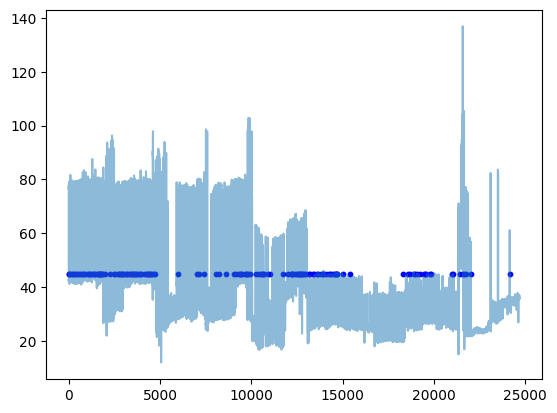

In [4]:


DLC_peaks, properties = scipy.signal.find_peaks(difference, height = 5, prominence = 15, distance = 30, width = 10)
print(len(DLC_peaks))
#DLC_peaks, properties = scipy.signal.find_peaks(difference, prominence = 5, distance = 30)
plt.plot(difference, alpha = .5)
plt.scatter(DLC_peaks, np.ones(len(DLC_peaks))*45, color = 'blue', s = 10)
#plt.scatter(PER_peaks[0], np.ones(len(PER_peaks[0]))*40, color = 'orange', s = 10)
#plt.plot(raw_PER, alpha = .5, color = 'orange')


#plt.xlim(0,10000)

In [5]:
## import csv code with labels I did 
#I labeled 2 points periodically
#when PERstarts coming out I labelled a third point (or if the per is small I labelled a third point)
##if the PER is big I labelled a 4th point at the peak

#the csv file repeats frame numbers for labelled points for each labelled point 
import csv
csv_path = "C:/Users/ashsm/Downloads/find_per_csv.csv"
labelled = []
with open(csv_path) as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    data_single = list(reader)
    labelled.append(data_single)
labelled = labelled[0]

In [6]:

##region id = 3 is fully extended prob
## region id = 0 is top of head
## region id = 1 is Proboscis tip
## region id = 2 is partially extended PER or beginning of full extension
header = labelled[0]
print(header)
print(len(labelled[0]))

all_big_per_frames = []
for i in range(len(labelled)):
    region_id = labelled[i][4]
    if region_id == '3':
        frame_id = labelled[i][0]
        all_big_per_frames.append(frame_id)
print(all_big_per_frames)


all_start_per_frames = []
for i in range(len(labelled)):
    region_id = labelled[i][4]
    if region_id == '2':
        frame_id = labelled[i][0]
        all_start_per_frames.append(frame_id)
#print(all_start_per_frames)

['filename', 'file_size', 'file_attributes', 'region_count', 'region_id', 'region_shape_attributes', 'region_attributes']
7
['V01frame0000147.jpg', 'V01frame0000789.jpg', 'V01frame0000860.jpg', 'V01frame0001204.jpg', 'V01frame0001299.jpg', 'V01frame0001331.jpg', 'V01frame0001341.jpg', 'V01frame0001490.jpg', 'V01frame0001670.jpg', 'V01frame0001779.jpg', 'V01frame0001858.jpg', 'V01frame0003077.jpg', 'V01frame0003301.jpg', 'V01frame0003596.jpg', 'V01frame0003766.jpg', 'V01frame0004289.jpg', 'V01frame0004477.jpg', 'V01frame0004615.jpg', 'V01frame0007057.jpg', 'V01frame0007418.jpg', 'V01frame0007456.jpg', 'V01frame0007460.jpg', 'V01frame0008940.jpg', 'V01frame0009149.jpg', 'V01frame0009421.jpg', 'V01frame0009648.jpg', 'V01frame0009916.jpg']


In [7]:
## get frame number out of frame filename
frame = 'V01frame0000147.jpg'
num_frame = frame.split('.')[0]
num_frame = int(num_frame.replace('V01frame', ''))
print(num_frame)

frame_num_big_per = []
for frame in all_big_per_frames:
    num_frame = frame.split('.')[0]
    num_frame = int(num_frame.replace('V01frame', ''))
    frame_num_big_per.append(num_frame)

frame_num_per = []
for frame in all_start_per_frames:
    num_frame = frame.split('.')[0]
    num_frame = int(num_frame.replace('V01frame', ''))
    frame_num_per.append(num_frame)

147


In [8]:
## open data from READ_ROIS
SavePath = 'C:/Users/ashsm/Documents/Stanford/bruker behavior/per'
with h5py.File(os.path.join(SavePath, "PERpeaks.hdf5"), "r") as f:
    print(f.keys())
    ROI_PER_peaks = f['PER peaks'][()]
    ROI_PER_raw = f['raw PER'][()]


<KeysViewHDF5 ['PER peaks', 'light peaks', 'raw PER', 'raw light']>


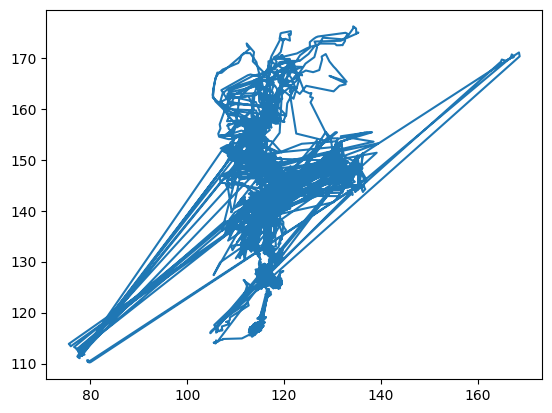

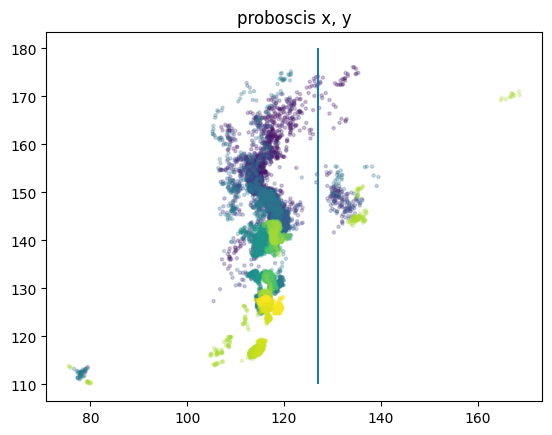

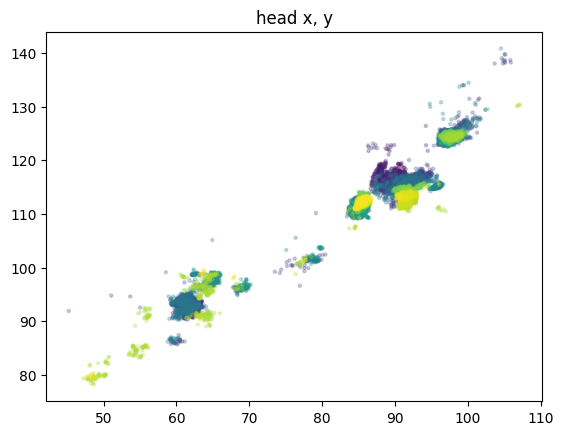

In [67]:
plt.plot(proboscis_x, proboscis_y)
plt.show()
plt.scatter(proboscis_x, proboscis_y, c = range(len(proboscis_x)), alpha = .25, s = 5)
plt.vlines(127, 110, 180)
plt.title('proboscis x, y')
plt.show()


plt.scatter(head_x, head_y, c = range(len(proboscis_x)), alpha = .25, s = 5)
plt.title('head x, y')
plt.show()
# x = range(len(proboscis_x))
# y = x
# plt.scatter(x, y, c=y)

269
['V01-frame_0000001.jpg', 'V01-frame_0000002.jpg', 'V01-frame_0000003.jpg', 'V01-frame_0000004.jpg', 'V01-frame_0000005.jpg', 'V01-frame_0000006.jpg', 'V01-frame_0000007.jpg', 'V01-frame_0000008.jpg', 'V01-frame_0000009.jpg', 'V01-frame_0000010.jpg']


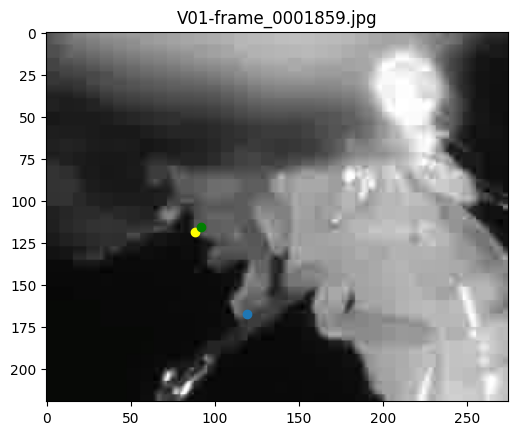

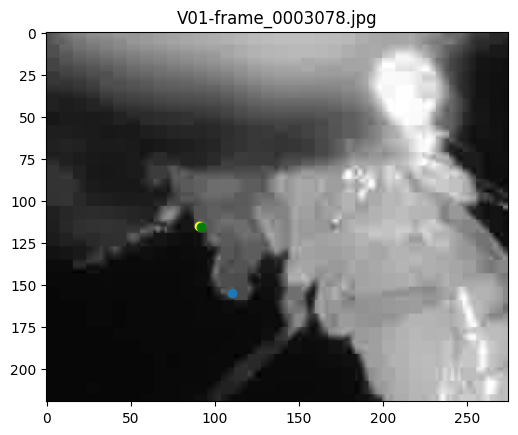

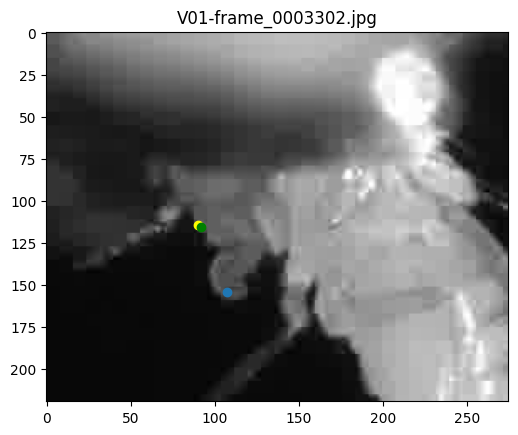

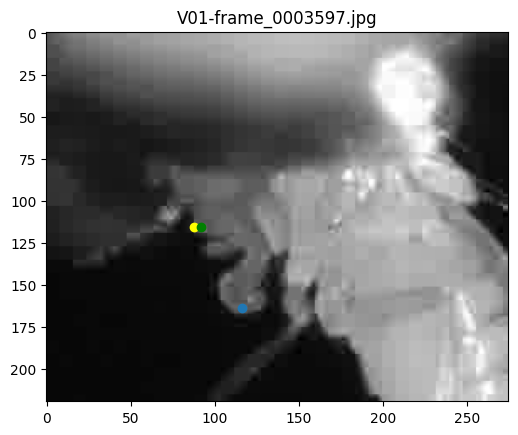

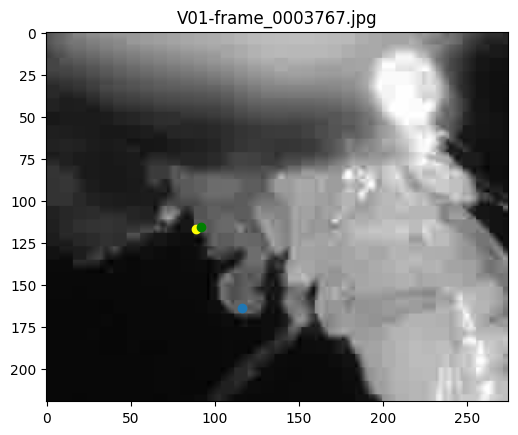

In [85]:
## look at the frames where x > 127 and y > 140 and <160
##test_per frames are C:\Users\ashsm\Documents\Stanford\bruker_deeplabcut\tight_crop_vids\test_per_frames
test_frames_path = "C:/Users/ashsm/Documents/Stanford/bruker_deeplabcut/tight_crop_vids/test_per_frames"

#find indices that meet my x, y requirements
#indices = np.where(np.logical_and(proboscis_x > 127,  140 < proboscis_y <160))
indices = []
for i in range(len(proboscis_x)):
    if proboscis_x[i] > 127 and 140 < proboscis_y[i] < 160:
        indices.append(i)
print(len(indices))

# plt.scatter(indices, np.ones(len(indices)))
# plt.scatter(frame_num_per, np.ones(len(frame_num_per)), color = 'green', s = 10, alpha = 1)
# plt.scatter(frame_num_big_per, np.ones(len(frame_num_big_per)), color = 'purple', s = 10, alpha = 1)
# plt.show()

# plt.scatter(proboscis_x, proboscis_y, c = range(len(proboscis_x)), alpha = .25, s = 5)
# plt.scatter(proboscis_x[frame_num_big_per], proboscis_y[frame_num_big_per], s = 10, color = 'orange')
# #plt.scatter(proboscis_x[DLC_peaks], proboscis_y[DLC_peaks], s = 5, color = 'red')
# plt.hlines(150, 80, 160)
# plt.vlines(127, 110, 170)
# #plt.scatter(proboscis_x[frame_num_per], proboscis_y[frame_num_per], s = 10, color = 'pink', alpha = .5)
# plt.show()



##now look at frames
all_frames = os.listdir(test_frames_path)  ##other systems this might not be in order. ok for now
print(all_frames[0:10])

# frame_number = 5
# frame = mpimg.imread(os.path.join(test_frames_path, all_frames[frame_number]))
# plt.scatter(proboscis_x[frame_number], proboscis_y[frame_number])
# plt.imshow(frame)
# plt.show()

median_head_x = np.median(head_x)
median_head_y = np.median(head_y)


for frame_number in frame_num_big_per[10:15]:
    frame = mpimg.imread(os.path.join(test_frames_path, all_frames[frame_number]))
    plt.scatter(proboscis_x[frame_number], proboscis_y[frame_number])
    plt.scatter(head_x[frame_number], head_y[frame_number], color = 'yellow')
    plt.scatter(median_head_x, median_head_y, color = 'green')
    plt.imshow(frame)
    plt.title(all_frames[frame_number])
    plt.show()



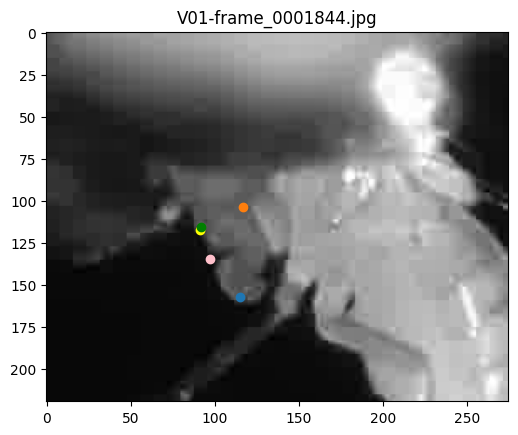

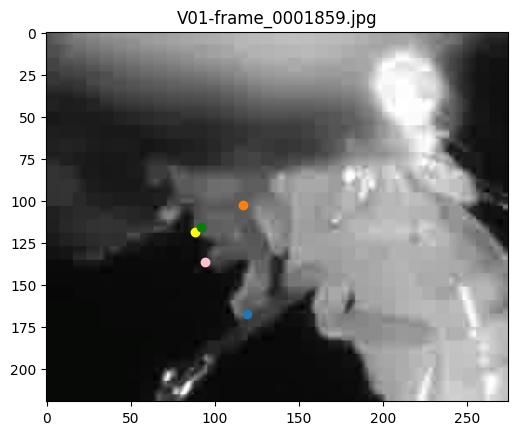

In [126]:
## not big PER to see what is going on
for frame_number in frame_num_per[20:22]:
    frame = mpimg.imread(os.path.join(test_frames_path, all_frames[frame_number]))
    plt.scatter(proboscis_x[frame_number], proboscis_y[frame_number])
    plt.scatter(neck_x[frame_number], neck_y[frame_number])
    plt.scatter(extend_x[frame_number], extend_y[frame_number], color = 'pink')
    plt.scatter(head_x[frame_number], head_y[frame_number], color = 'yellow')
    plt.scatter(median_head_x, median_head_y, color = 'green')
    plt.imshow(frame)
    plt.title(all_frames[frame_number])
    plt.show()

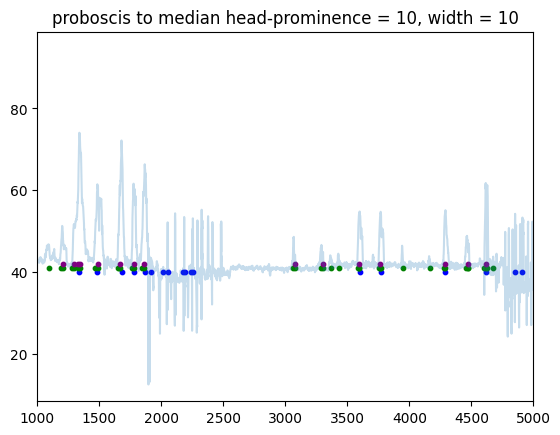

In [112]:
##calculate the distance using the median head position

median_head_x = np.median(head_x)
median_head_y = np.median(head_y)

median_difference_PER = np.sqrt((proboscis_x - np.ones(len(proboscis_x))*median_head_x)**2 + (proboscis_y - np.ones(len(proboscis_y))*median_head_y)**2)
median_DLC_peaks, properties = scipy.signal.find_peaks(median_difference_PER, height = 10, prominence = 10, width = 10)

plt.plot(median_difference_PER, alpha = .25)
plt.scatter(median_DLC_peaks, np.ones(len(median_DLC_peaks))*40, color = 'blue', s = 10)
plt.scatter(frame_num_per, np.ones(len(frame_num_per))*41, color = 'green', s = 10, alpha = 1)
plt.scatter(frame_num_big_per, np.ones(len(frame_num_big_per))*42, color = 'purple', s = 10, alpha = 1)
plt.title('proboscis to median head-prominence = 10, width = 10')
plt.xlim(1000,5000)
plt.show()

4
5
6
7
8
9
10
11
12
13
14


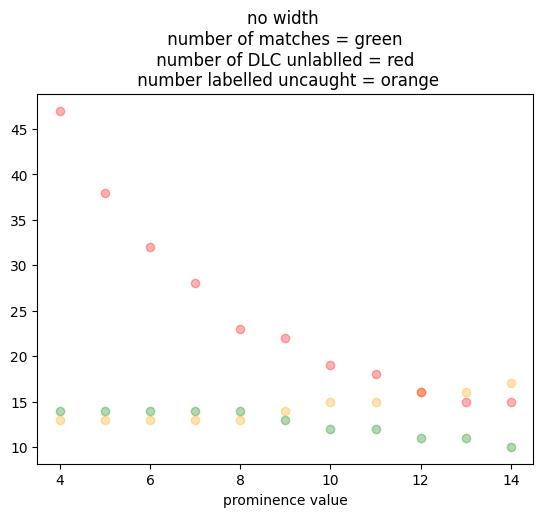

In [131]:
for prominence in range(4,15):
    median_DLC_peaks, properties = scipy.signal.find_peaks(median_difference_PER, height = 10, prominence = prominence, width = 10)
    print(prominence)

    variance = 5 #number of frames I'll allow as buffer (times two)
    count_matches = 0
    for lab_peak in frame_num_big_per:
        peak_allowance = [lab_peak+i for i in range(variance*-1, variance)]
        for peak in peak_allowance:
            if peak in median_DLC_peaks:
                # print('labelled peak', lab_peak)
                # print('found in DLC', peak)
                count_matches += 1
    # print('prominence =', prominence)
    # print("number of peaks that DLC and labelled both found:",count_matches)
    # #print(len(frame_num_big_per))
    # print('number of labelled PER that DLC missed:', len(frame_num_big_per) - count_matches)
    # print('number of DLC peaks that are unlabelled:', len(median_DLC_peaks) - count_matches)
    plt.scatter(prominence, count_matches, color = 'green', alpha = .3)
    plt.scatter(prominence, (len(frame_num_big_per) - count_matches), color = 'orange', alpha = .3)
    plt.scatter(prominence, len(median_DLC_peaks) - count_matches, color = 'red', alpha = .3)
plt.title('no width \n number of matches = green \n number of DLC unlablled = red \n number labelled uncaught = orange')
#plt.ylim(0,40)
plt.xlabel("prominence value")
plt.show()

8
found [147, 789, 1204, 1341, 1779, 3596, 3766, 4289, 4615, 7418, 7456, 7460, 9149, 9421, 9648]
15
not found [860, 1299, 1331, 1490, 1670, 1858, 3077, 3301, 4477, 7057, 8940, 9916]
12
[56.77511573 53.57061368 49.97169867 73.28428449 58.83173567 54.08253094
 54.22471435 54.80323131 61.6971662  43.913309   60.37136641 52.01402633
 54.9178417  48.71754604 57.35881248]
[52.51031944 51.15052215 62.51730962 57.83351189 62.33645121 58.82269581
 43.31583256 42.09862205 46.24031729 42.00058822 39.93358697 61.24820222]


Text(0.5, 1.0, 'median difference of peaks found and not found: found = green, not found = red')

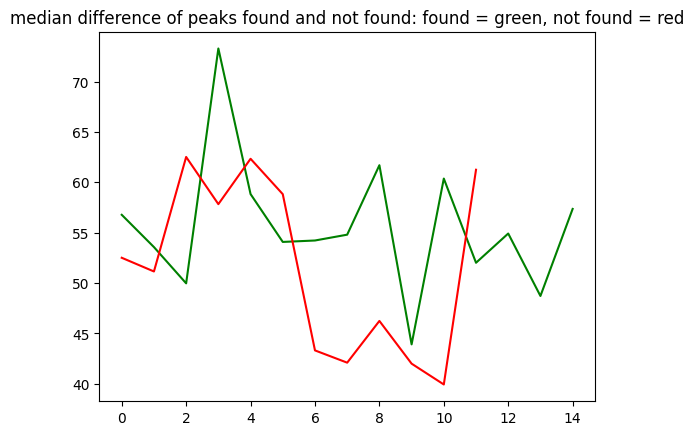

In [191]:
## get frames of labelled PER that are not caught by DLC peaks
prominence = 8
height = 45
width = .5
median_DLC_peaks, properties = scipy.signal.find_peaks(median_difference_PER, height = height, prominence = prominence, width = width)
print(prominence)

variance = 5 #number of frames I'll allow as buffer (times two)
count_matches = 0
found_labelled_peaks = []
peaks_not_found = []
for lab_peak in frame_num_big_per:
    peak_allowance = [lab_peak+i for i in range(variance*-1, variance)]
    for peak in peak_allowance:
        if peak in median_DLC_peaks:
            # print('labelled peak', lab_peak)
            # print('found in DLC', peak)
            count_matches += 1
            found_labelled_peaks.append(lab_peak)

for peak in frame_num_big_per:
    if peak not in found_labelled_peaks:
        peaks_not_found.append(peak)

#then make a list of peaks that are in DLC_peaks that aren't in either lab peak list

print('found', found_labelled_peaks)
print(len(found_labelled_peaks))
print('not found', peaks_not_found)
print(len(peaks_not_found))
# for frame_number in peaks_not_found:
#     frame = mpimg.imread(os.path.join(test_frames_path, all_frames[frame_number]))
#     plt.scatter(proboscis_x[frame_number], proboscis_y[frame_number])
#     # plt.scatter(neck_x[frame_number], neck_y[frame_number])
#     # plt.scatter(extend_x[frame_number], extend_y[frame_number], color = 'pink')
#     # plt.scatter(head_x[frame_number], head_y[frame_number], color = 'yellow')
#     plt.scatter(median_head_x, median_head_y, color = 'green')
#     plt.imshow(frame)
#     plt.title('NOT FOUND PER frame: ' + str(all_frames[frame_number]) + '\n median difference = ' + str(median_difference_PER[frame_number]))
#     plt.show()

print(median_difference_PER[found_labelled_peaks])

print(median_difference_PER[peaks_not_found])
plt.plot(median_difference_PER[found_labelled_peaks], color = 'green')
plt.plot(median_difference_PER[peaks_not_found], color ='red')
plt.title('median difference of peaks found and not found: found = green, not found = red')

[50.27466462 47.84352955 48.68177365 46.620539   57.38851922 51.91223864
 55.77042044 51.32295612 53.33210574 29.54800368 39.53497692 39.78716108
 39.55647896 45.03117142 39.40814919 40.54144516 43.66883035 47.81976754
 45.90231837 45.06944138 45.44509742 44.29052376 47.62153177 47.80993087
 44.78426109 44.73190007 37.55863588 50.35609635 42.5607917  37.86717595
 39.10270426 39.24139671 43.35115075 39.89578457 39.69934516 39.68982088
 40.44234874 38.85009174 43.70017597 39.56397612 40.96994302 39.11748405
 43.71788722 38.99854245 42.63031892 43.54129927 45.03559743 41.75894473
 39.45116581 46.8441706  45.67297314 47.24290086 42.81584551 47.28637583
 45.31738009 42.69341303 44.94498749 47.55415015 41.32069967 47.18873884
 39.65094682 34.71603615 34.97203471 35.1226406  53.03862078 34.99843988
 54.16135904]


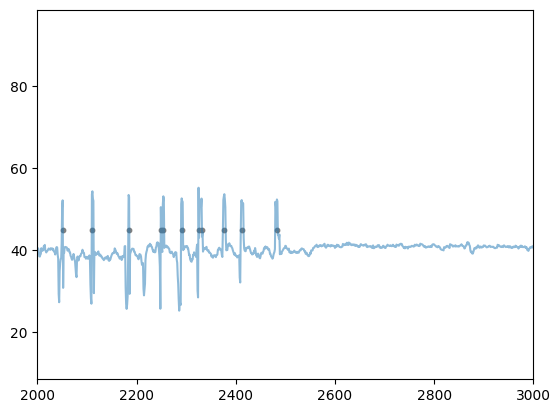

In [193]:
plt.plot(median_difference_PER, alpha = .5)
plt.scatter(peaks_not_found, np.ones(len(peaks_not_found))*45, color = 'red', s = 10)
plt.scatter(found_labelled_peaks, np.ones(len(found_labelled_peaks))*45, color = 'green', s = 10)
plt.scatter(median_DLC_peaks, np.ones(len(median_DLC_peaks))*45, s = 10, color = 'grey')
plt.xlim(0,10000)
plt.xlim(2000,3000)

print(properties['width_heights'])


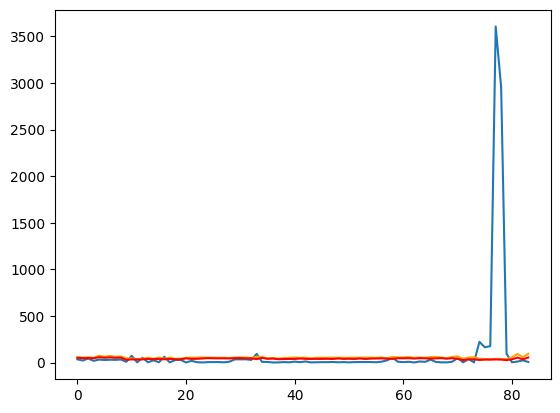

In [188]:

DLC_width_heights = properties['width_heights']  #width heights is the height at which the width is measured
DLC_left_bases = properties['left_bases'] ##use for onset
DLC_widths = properties['widths']
DLC_heights = properties['peak_heights']
DLC_prominences = properties['prominences']

plt.plot(DLC_widths)
plt.plot(DLC_heights, color= 'orange')
plt.plot(DLC_width_heights, color='red')


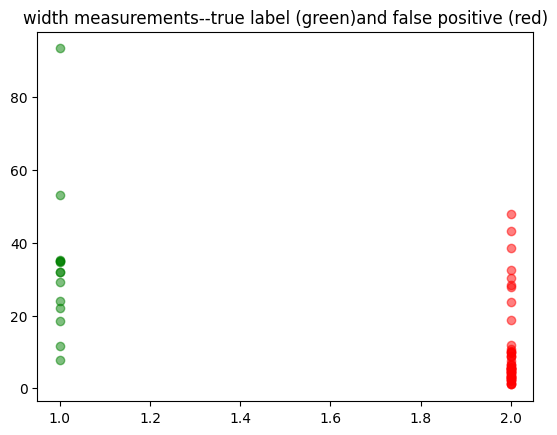

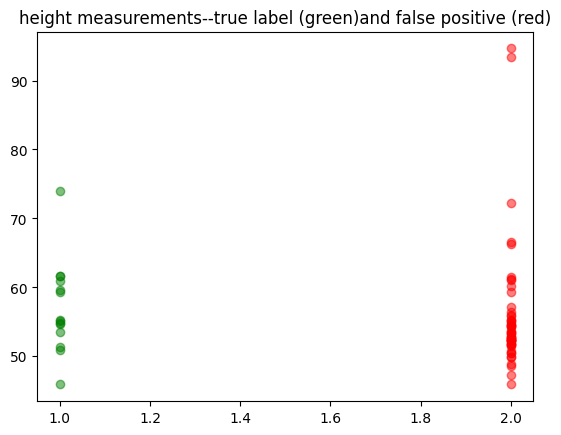

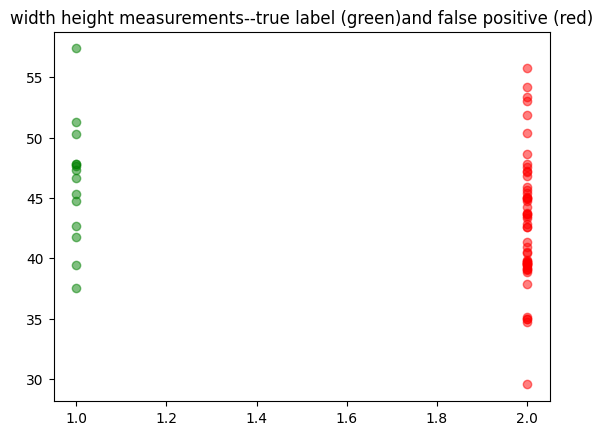

14
53


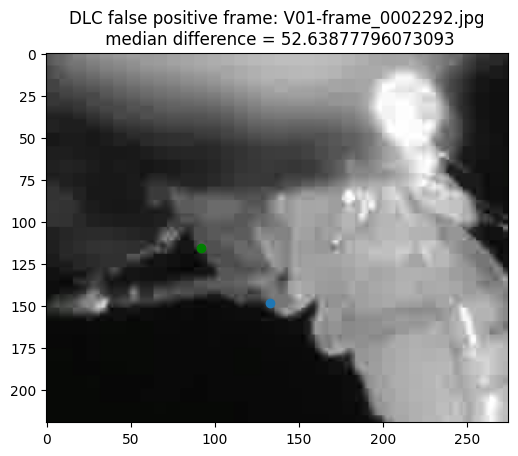

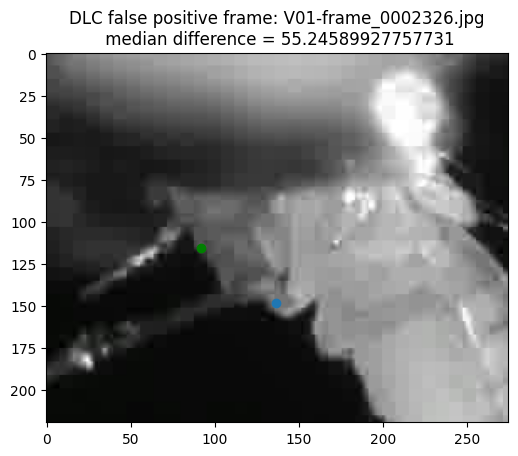

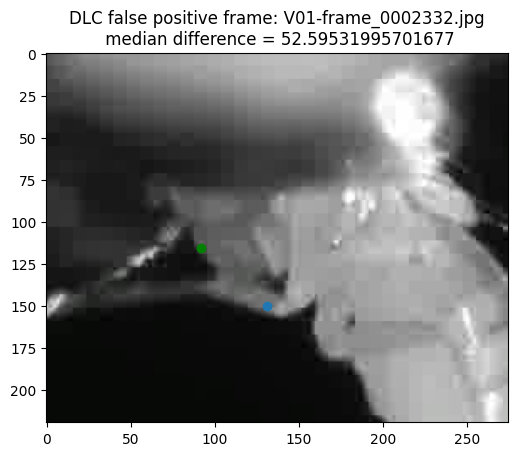

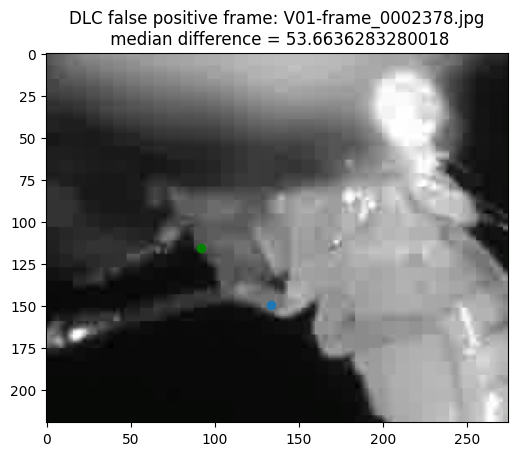

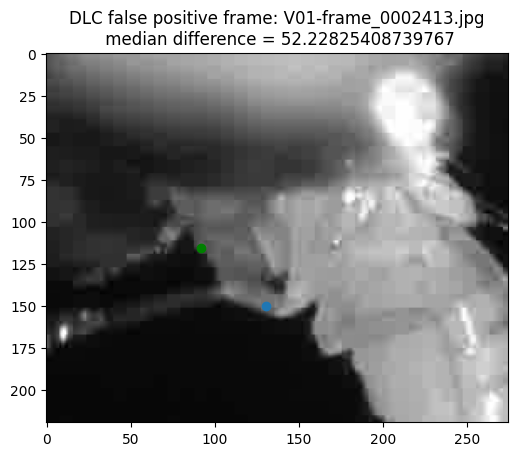

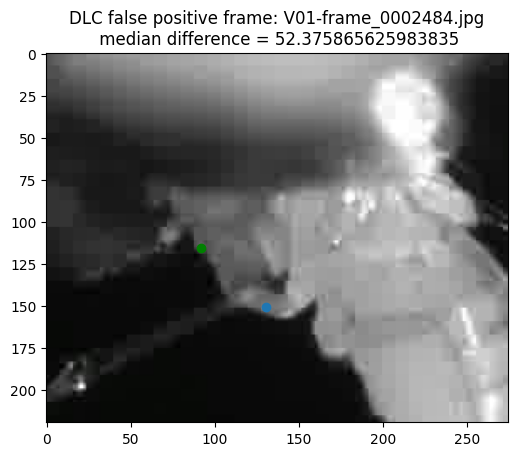

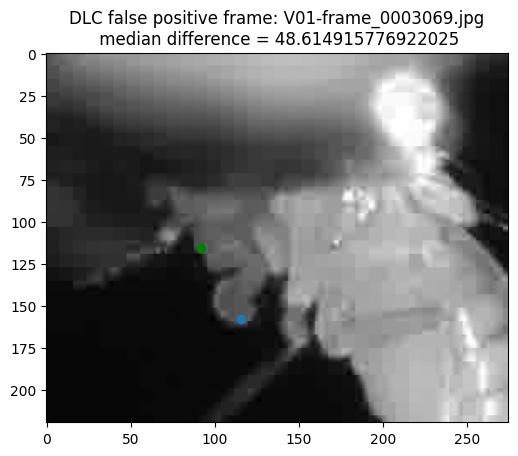

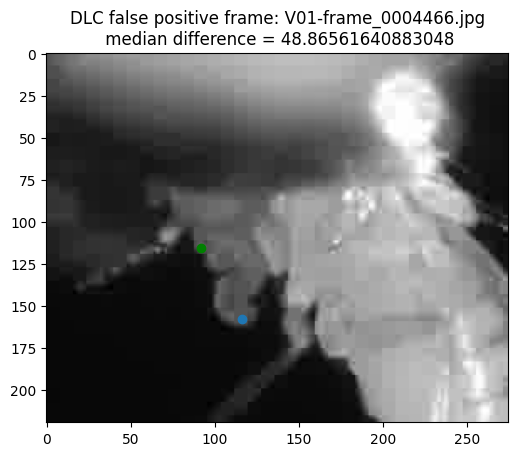

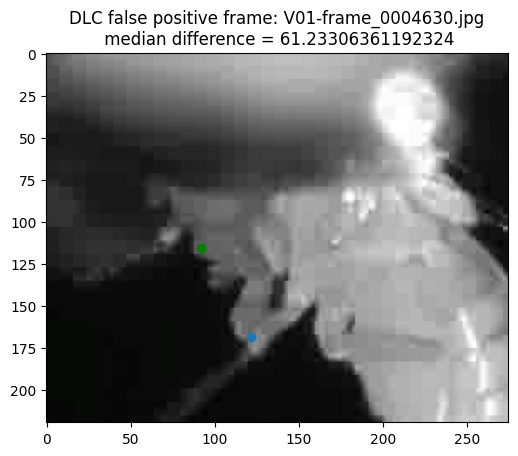

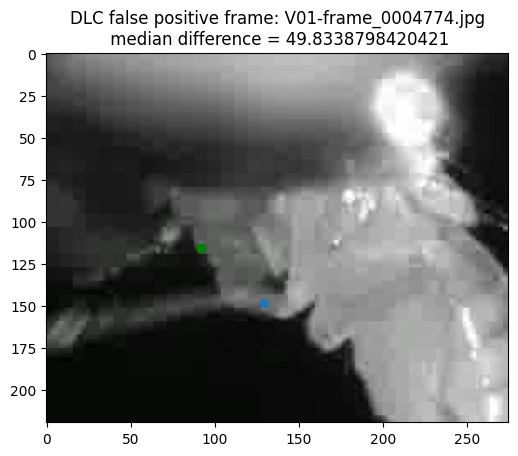

In [194]:
## things DLC thinks are peaks but are not

variance = 5 #number of frames I'll allow as buffer (times two)


DLC_positive = []
positive_width = []
positive_width_heights = []
positive_heights = []
for dlc_peak_i in range(len(median_DLC_peaks)):
    dlc_peak = median_DLC_peaks[dlc_peak_i]
    peak_allowance = [dlc_peak+i for i in range(variance*-1, variance)]
    for peak in peak_allowance:
        if peak in found_labelled_peaks:
            DLC_positive.append(dlc_peak)
            positive_width.append(properties['widths'][dlc_peak_i])
            positive_heights.append(properties['peak_heights'][dlc_peak_i])
            positive_width_heights.append(properties['width_heights'][dlc_peak_i])

DLC_false_positive = []
false_positive_width = []
false_positive_width_heights = []
false_positive_heights = []
for dlc_peak_i in range(len(median_DLC_peaks)):
    dlc_peak = median_DLC_peaks[dlc_peak_i]
    if dlc_peak not in DLC_positive:
        DLC_false_positive.append(dlc_peak)
        false_positive_width.append(properties['widths'][dlc_peak_i])
        false_positive_heights.append(properties['peak_heights'][dlc_peak_i])
        false_positive_width_heights.append(properties['width_heights'][dlc_peak_i])
        
plt.scatter(np.ones(len(positive_width)), positive_width, color = 'green', alpha = .5)
plt.scatter(np.ones(len(false_positive_width))*2, false_positive_width, color = 'red', alpha = .5)
plt.title('width measurements--true label (green)and false positive (red)')
plt.show()

plt.scatter(np.ones(len(positive_heights)), positive_heights, color = 'green', alpha = .5)
plt.scatter(np.ones(len(false_positive_heights))*2, false_positive_heights, color = 'red', alpha = .5)
plt.title('height measurements--true label (green)and false positive (red)')
plt.show()

plt.scatter(np.ones(len(positive_width_heights)), positive_width_heights, color = 'green', alpha = .5)
plt.scatter(np.ones(len(false_positive_width_heights))*2, false_positive_width_heights, color = 'red', alpha = .5)
plt.title('width height measurements--true label (green)and false positive (red)')
plt.show()



print(len(DLC_positive))
print(len(DLC_false_positive))

for frame_number in DLC_false_positive[10:20]:
    frame = mpimg.imread(os.path.join(test_frames_path, all_frames[frame_number]))
    plt.scatter(proboscis_x[frame_number], proboscis_y[frame_number])
    # plt.scatter(neck_x[frame_number], neck_y[frame_number])
    # plt.scatter(extend_x[frame_number], extend_y[frame_number], color = 'pink')
    # plt.scatter(head_x[frame_number], head_y[frame_number], color = 'yellow')
    plt.scatter(median_head_x, median_head_y, color = 'green')
    plt.imshow(frame)
    plt.title('DLC false positive frame: ' + str(all_frames[frame_number]) + '\n median difference = ' + str(median_difference_PER[frame_number]))
    plt.show()

8
found [147, 789, 1204, 1341, 1779, 3595, 3596, 3766, 3772, 4289, 4470, 4615, 7410, 7418, 7456, 7460, 9149, 9417, 9421, 9648]
20
not found [103, 774, 841, 860, 1093, 1190, 1282, 1299, 1331, 1463, 1490, 1650, 1662, 1670, 1767, 1843, 1858, 3060, 3077, 3285, 3301, 3366, 3430, 3583, 3595, 3756, 3761, 3772, 3948, 4164, 4278, 4460, 4470, 4477, 4606, 4624, 4676, 5432, 5919, 6209, 7045, 7047, 7048, 7057, 7125, 7227, 7410, 7449, 7822, 8548, 8932, 8940, 9117, 9143, 9417, 9517, 9639, 9897, 9916, 11786, 11928, 12013, 12362, 12898, 13163, 13604, 17590, 17644, 18404, 18661, 18802, 18889, 19081, 19489, 19882]
75


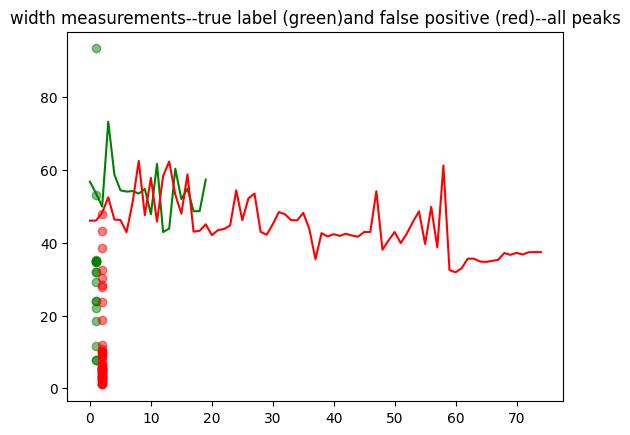

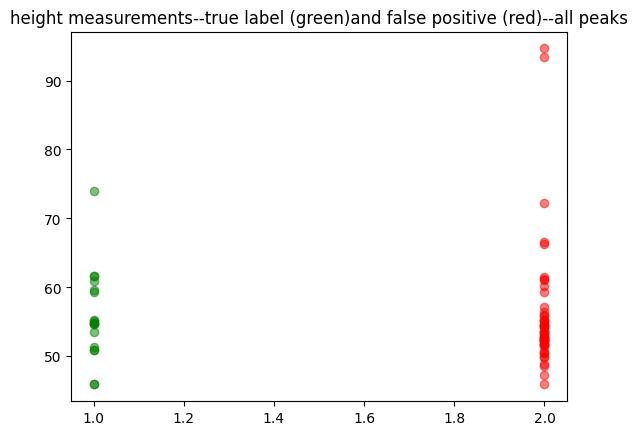

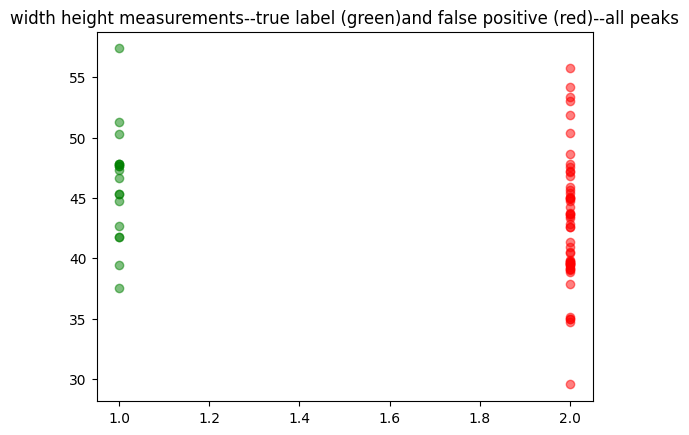

18
53


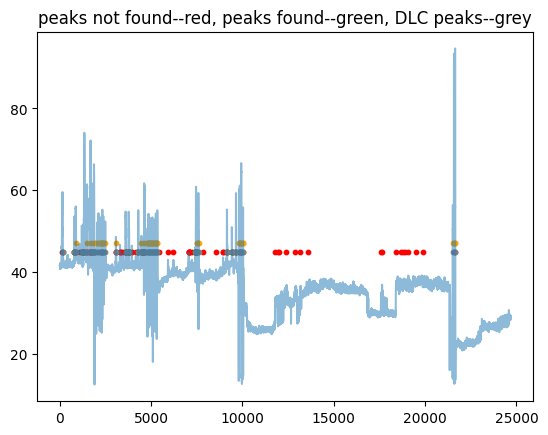

In [204]:
##find false positives for not just big peaks


## get frames of labelled PER that are not caught by DLC peaks
prominence = 8
height = 45
width = .5
median_DLC_peaks, properties = scipy.signal.find_peaks(median_difference_PER, height = height, prominence = prominence, width = width)
print(prominence)

variance = 5 #number of frames I'll allow as buffer (times two)
count_matches = 0
found_labelled_peaks_all = []
peaks_not_found_all = []
for lab_peak in frame_num_per:
    peak_allowance = [lab_peak+i for i in range(variance*-1, variance)]
    for peak in peak_allowance:
        if peak in median_DLC_peaks:
            # print('labelled peak', lab_peak)
            # print('found in DLC', peak)
            count_matches += 1
            found_labelled_peaks_all.append(lab_peak)

for peak in frame_num_per:
    if peak not in found_labelled_peaks:
        peaks_not_found_all.append(peak)

#then make a list of peaks that are in DLC_peaks that aren't in either lab peak list

print('found', found_labelled_peaks_all)
print(len(found_labelled_peaks_all))
print('not found', peaks_not_found_all)
print(len(peaks_not_found_all))
# for frame_number in peaks_not_found:
#     frame = mpimg.imread(os.path.join(test_frames_path, all_frames[frame_number]))
#     plt.scatter(proboscis_x[frame_number], proboscis_y[frame_number])
#     # plt.scatter(neck_x[frame_number], neck_y[frame_number])
#     # plt.scatter(extend_x[frame_number], extend_y[frame_number], color = 'pink')
#     # plt.scatter(head_x[frame_number], head_y[frame_number], color = 'yellow')
#     plt.scatter(median_head_x, median_head_y, color = 'green')
#     plt.imshow(frame)
#     plt.title('NOT FOUND PER frame: ' + str(all_frames[frame_number]) + '\n median difference = ' + str(median_difference_PER[frame_number]))
#     plt.show()

# print(median_difference_PER[found_labelled_peaks])

# print(median_difference_PER[peaks_not_found])
plt.plot(median_difference_PER[found_labelled_peaks_all], color = 'green')
plt.plot(median_difference_PER[peaks_not_found_all], color ='red')
plt.title('median difference of peaks found and not found for all peaks: found = green, not found = red')



## things DLC thinks are peaks but are not

variance = 5 #number of frames I'll allow as buffer (times two)


DLC_positive_all = []
positive_width = []
positive_width_heights = []
positive_heights = []
for dlc_peak_i in range(len(median_DLC_peaks)):
    dlc_peak = median_DLC_peaks[dlc_peak_i]
    peak_allowance = [dlc_peak+i for i in range(variance*-1, variance)]
    for peak in peak_allowance:
        if peak in found_labelled_peaks_all:
            DLC_positive_all.append(dlc_peak)
            positive_width.append(properties['widths'][dlc_peak_i])
            positive_heights.append(properties['peak_heights'][dlc_peak_i])
            positive_width_heights.append(properties['width_heights'][dlc_peak_i])

DLC_false_positive_all = []
false_positive_width = []
false_positive_width_heights = []
false_positive_heights = []
for dlc_peak_i in range(len(median_DLC_peaks)):
    dlc_peak = median_DLC_peaks[dlc_peak_i]
    if dlc_peak not in DLC_positive:
        DLC_false_positive_all.append(dlc_peak)
        false_positive_width.append(properties['widths'][dlc_peak_i])
        false_positive_heights.append(properties['peak_heights'][dlc_peak_i])
        false_positive_width_heights.append(properties['width_heights'][dlc_peak_i])
        
plt.scatter(np.ones(len(positive_width)), positive_width, color = 'green', alpha = .5)
plt.scatter(np.ones(len(false_positive_width))*2, false_positive_width, color = 'red', alpha = .5)
plt.title('width measurements--true label (green)and false positive (red)--all peaks')
plt.show()

plt.scatter(np.ones(len(positive_heights)), positive_heights, color = 'green', alpha = .5)
plt.scatter(np.ones(len(false_positive_heights))*2, false_positive_heights, color = 'red', alpha = .5)
plt.title('height measurements--true label (green)and false positive (red)--all peaks')
plt.show()

plt.scatter(np.ones(len(positive_width_heights)), positive_width_heights, color = 'green', alpha = .5)
plt.scatter(np.ones(len(false_positive_width_heights))*2, false_positive_width_heights, color = 'red', alpha = .5)
plt.title('width height measurements--true label (green)and false positive (red)--all peaks')
plt.show()



print(len(DLC_positive_all))
print(len(DLC_false_positive_all))

for frame_number in DLC_false_positive_all[10:20]:
    frame = mpimg.imread(os.path.join(test_frames_path, all_frames[frame_number]))
    
    # plt.scatter(neck_x[frame_number], neck_y[frame_number])
    # plt.scatter(extend_x[frame_number], extend_y[frame_number], color = 'pink')
    # plt.scatter(head_x[frame_number], head_y[frame_number], color = 'yellow')
    
    # plt.scatter(proboscis_x[frame_number], proboscis_y[frame_number])
    # plt.scatter(median_head_x, median_head_y, color = 'green')
    # plt.imshow(frame)
    # plt.title('DLC false positive frame: ' + str(all_frames[frame_number]) + '\n median difference = ' + str(median_difference_PER[frame_number]))
    # plt.show()

plt.plot(median_difference_PER, alpha = .5)
plt.scatter(peaks_not_found_all, np.ones(len(peaks_not_found_all))*45, color = 'red', s = 10)
plt.scatter(found_labelled_peaks_all, np.ones(len(found_labelled_peaks_all))*45, color = 'green', s = 10)
plt.scatter(median_DLC_peaks, np.ones(len(median_DLC_peaks))*45, s = 10, color = 'grey')
plt.scatter(DLC_false_positive_all,np.ones(len(DLC_false_positive_all))*47, s = 10, color = 'orange')
plt.title("peaks not found--red, peaks found--green, DLC peaks--grey")
#plt.xlim(2000,3000)
plt.show()


[array([54.3135683 , 54.23297685, 54.19520137, 54.53695182, 55.05095752,
       55.62385858, 56.04916878, 56.2796817 , 56.51892428, 56.70131292,
       57.42796282, 57.92330348, 58.36301909, 59.04676784, 59.35485143,
       59.42506579, 59.42397968, 59.55714095, 59.31989341, 57.46205274,
       56.77511573, 54.87773758, 51.39120817, 51.08142236, 50.33713085,
       50.21073728, 48.99534326, 48.82788712, 50.95921775, 50.66310602,
       49.19601961, 48.13621897, 48.4785945 , 47.03897934, 45.94634899,
       45.52052922, 44.79186951, 44.60662533, 43.90489863, 43.93946467]), array([42.31702334, 42.20534641, 42.82230757, 43.16777468, 44.60271085,
       46.1163596 , 46.18650953, 46.93560686, 47.54553258, 47.77036269,
       49.15508699, 49.74170506, 50.00106156, 51.05018294, 51.54228085,
       51.83859084, 52.46514251, 52.34401007, 53.03863465, 53.24661933,
       53.57061368, 53.48791696, 52.94479039, 53.50590552, 53.51324284,
       53.34179475, 53.4247683 , 52.70170118, 51.99703359, 50

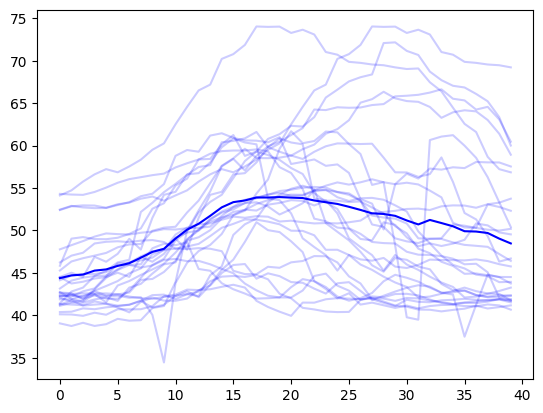

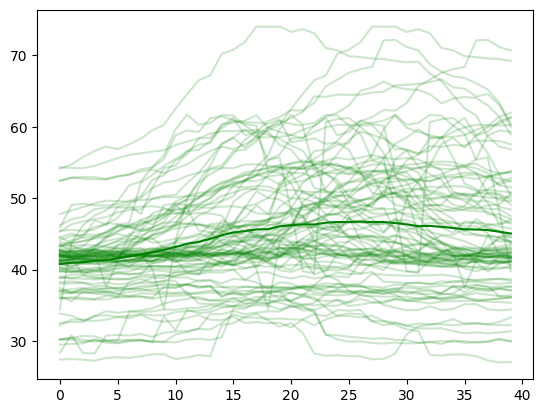

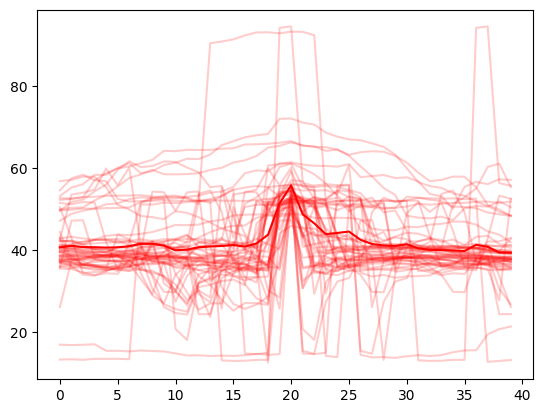

Text(0.5, 1.0, 'distance for 5 frames before and after peak for false pos (red), all per (green), and big per (blue)')

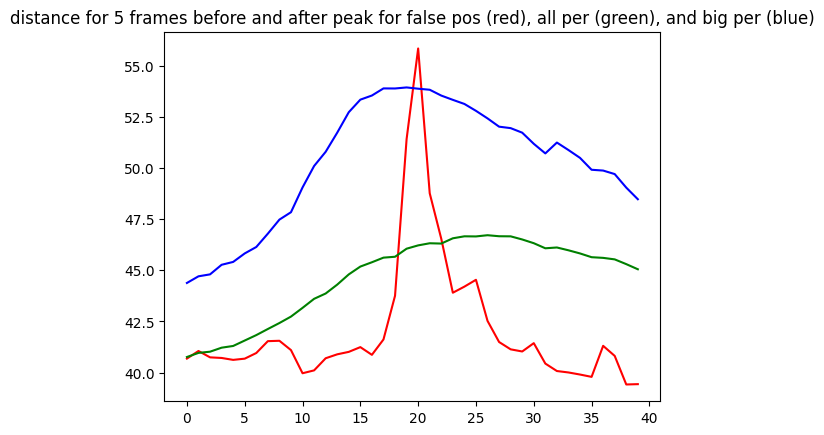

: 

In [224]:
##I want to see if the number of frames where the difference is high is bigger surrounding a true PER than a false positive
# DLC_false_positive_all
# frame_num_per
# frame_num_big_per
# median_difference_PER

#take the mean of the difference in the five frames before and the five frames after

#10 frame mean for big per

# for frame in frame_num_big_per:
#     big_per_distances.append(np.mean(median_difference_PER[frame - frames_to_include: frame + frames_to_include]))

# reg_per_distances = []
# for frame in frame_num_per:
#     reg_per_distances.append(np.mean(median_difference_PER[frame - frames_to_include: frame + frames_to_include]))

# false_pos_distances = []
# for frame in DLC_false_positive_all:
#     false_pos_distances.append(np.mean(median_difference_PER[frame - frames_to_include: frame + frames_to_include]))

# plt.scatter(np.ones(len(big_per_distances)), big_per_distances, alpha = .5)
# plt.scatter(np.ones(len(reg_per_distances))*2, reg_per_distances, alpha = .5, color = 'green')
# plt.scatter(np.ones(len(false_pos_distances))*3, false_pos_distances, color = 'red', alpha = .5)
# plt.title('mean distance for 10 frames surrounding PER for \n big per (blue), all per (green) and false positive (red')

frames_to_include = 20
big_per_distances = []
for frame in frame_num_big_per:
    big_per_distances.append((median_difference_PER[frame - frames_to_include: frame + frames_to_include]))


reg_per_distances = []
for frame in frame_num_per:
    reg_per_distances.append((median_difference_PER[frame - frames_to_include: frame + frames_to_include]))

false_pos_distances = []
for frame in DLC_false_positive_all:
    false_pos_distances.append((median_difference_PER[frame - frames_to_include: frame + frames_to_include]))


print(big_per_distances)

for per_frames in big_per_distances:
    plt.plot(per_frames, color = 'blue', alpha = .2)
plt.plot(np.mean(big_per_distances, axis = 0), color = 'blue')
plt.show()

for per_frames in reg_per_distances:
    plt.plot(per_frames, color = 'green', alpha = .2)
plt.plot(np.mean(reg_per_distances, axis = 0), color = 'green')
plt.show()

for per_frames in false_pos_distances:
    plt.plot(per_frames, color = 'red', alpha = .2)
plt.plot(np.mean(false_pos_distances, axis = 0), color = 'red')
plt.show()

plt.plot(np.mean(false_pos_distances, axis = 0), color = 'red')
plt.plot(np.mean(reg_per_distances, axis = 0), color = 'green')
plt.plot(np.mean(big_per_distances, axis = 0), color = 'blue')
plt.title('distance for 5 frames before and after peak for false pos (red), all per (green), and big per (blue)')




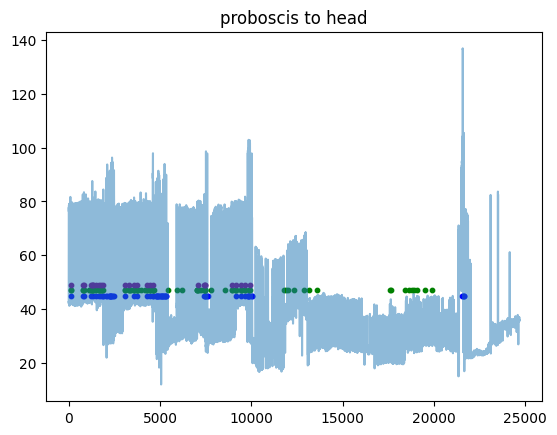

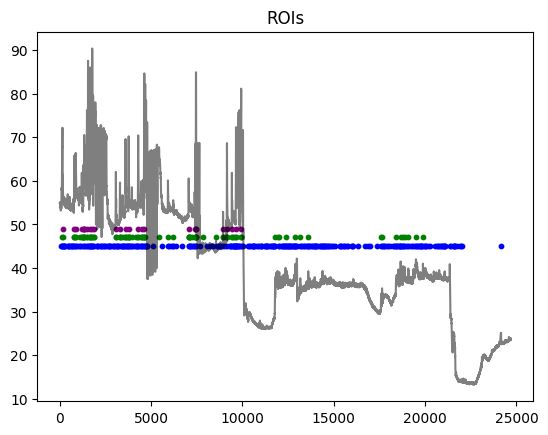

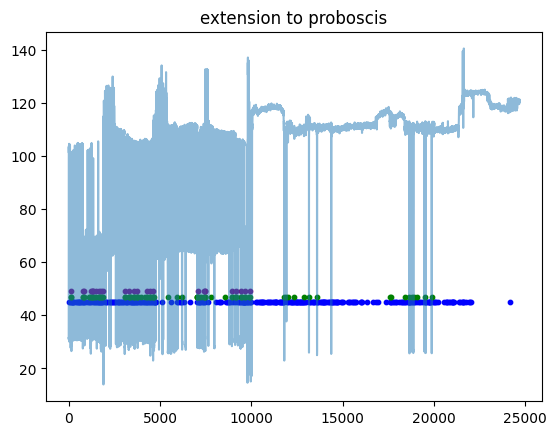

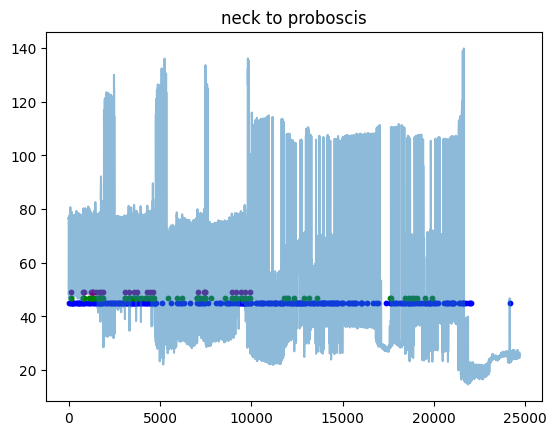

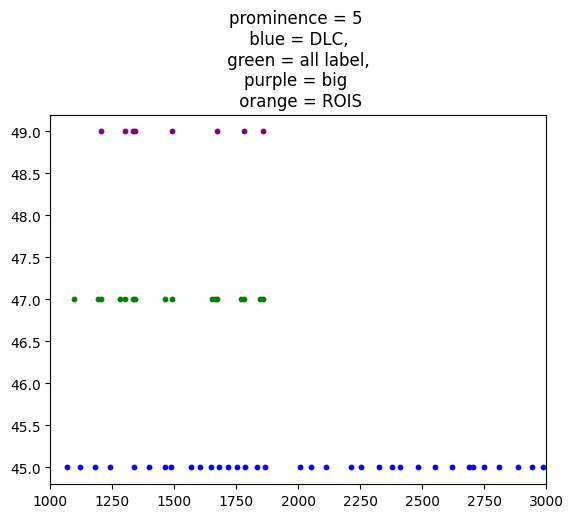

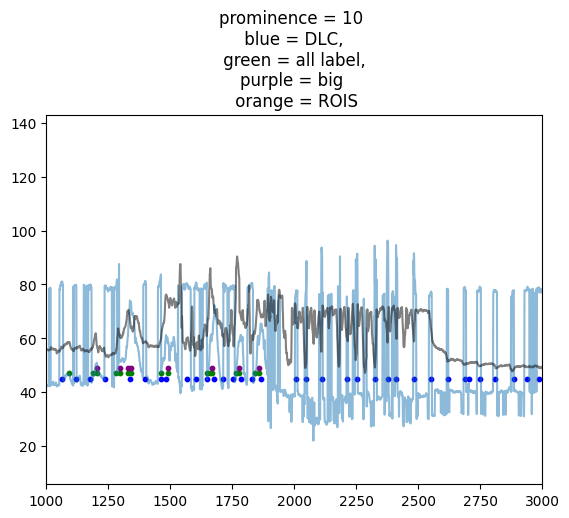

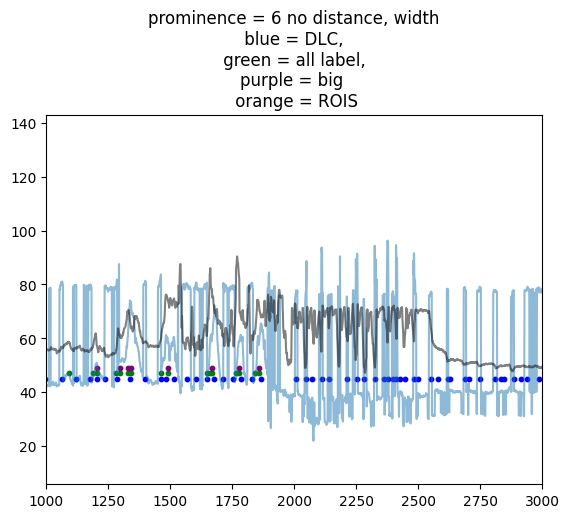

In [197]:
start = 1000
stop = 3000

## plot my labelled frames vs. DLC
DLC_peaks, properties = scipy.signal.find_peaks(difference, height = 1, prominence = 10, distance = 15, width = 5)

plt.plot(difference, alpha = .5)
plt.scatter(median_DLC_peaks, np.ones(len(median_DLC_peaks))*45, color = 'blue', s = 10)
plt.scatter(frame_num_per, np.ones(len(frame_num_per))*47, color = 'green', s = 10, alpha = 1)
plt.scatter(frame_num_big_per, np.ones(len(frame_num_big_per))*49, color = 'purple', s = 10, alpha = 1)
plt.title('proboscis to head')
plt.show()
plt.plot(ROI_PER_raw, color = 'black', alpha = .5)
plt.scatter(DLC_peaks, np.ones(len(DLC_peaks))*45, color = 'blue', s = 10)
plt.scatter(frame_num_per, np.ones(len(frame_num_per))*47, color = 'green', s = 10, alpha = 1)
plt.scatter(frame_num_big_per, np.ones(len(frame_num_big_per))*49, color = 'purple', s = 10, alpha = 1)
plt.title('ROIs')
plt.show()
plt.plot(ext_diff, alpha = .5)
plt.scatter(DLC_peaks, np.ones(len(DLC_peaks))*45, color = 'blue', s = 10)
plt.scatter(frame_num_per, np.ones(len(frame_num_per))*47, color = 'green', s = 10, alpha = 1)
plt.scatter(frame_num_big_per, np.ones(len(frame_num_big_per))*49, color = 'purple', s = 10, alpha = 1)
plt.title('extension to proboscis')
plt.show()
plt.plot(neck_diff, alpha = .5)
plt.scatter(DLC_peaks, np.ones(len(DLC_peaks))*45, color = 'blue', s = 10)
plt.scatter(frame_num_per, np.ones(len(frame_num_per))*47, color = 'green', s = 10, alpha = 1)
plt.scatter(frame_num_big_per, np.ones(len(frame_num_big_per))*49, color = 'purple', s = 10, alpha = 1)
plt.title('neck to proboscis')
plt.show()

plt.scatter(DLC_peaks, np.ones(len(DLC_peaks))*45, color = 'blue', s = 10)
plt.scatter(frame_num_per, np.ones(len(frame_num_per))*47, color = 'green', s = 10, alpha = 1)
plt.scatter(frame_num_big_per, np.ones(len(frame_num_big_per))*49, color = 'purple', s = 10, alpha = 1)
#plt.scatter(ROI_PER_peaks, np.ones(len(ROI_PER_peaks))*50, color = 'orange', s = 10)
plt.title(f'prominence = 5 \n blue = DLC, \n green = all label, \npurple = big \n orange = ROIS')

plt.xlim(start,stop)
plt.show()

DLC_peaks, properties = scipy.signal.find_peaks(difference, height = 1, prominence = 10, distance = 15, width = 5)

plt.plot(difference, alpha = .5)
plt.plot(ROI_PER_raw, color = 'black', alpha = .5)

plt.scatter(DLC_peaks, np.ones(len(DLC_peaks))*45, color = 'blue', s = 10)
plt.scatter(frame_num_per, np.ones(len(frame_num_per))*47, color = 'green', s = 10, alpha = 1)
plt.scatter(frame_num_big_per, np.ones(len(frame_num_big_per))*49, color = 'purple', s = 10, alpha = 1)
#plt.scatter(ROI_PER_peaks, np.ones(len(ROI_PER_peaks))*50, color = 'orange', s = 10)
plt.title(f'prominence = 10 \n blue = DLC, \n green = all label, \npurple = big \n orange = ROIS')
plt.xlim(start,stop)
plt.show()

DLC_peaks, properties = scipy.signal.find_peaks(difference, prominence = 6, width = 5)

plt.plot(difference, alpha = .5)
plt.plot(ROI_PER_raw, color = 'black', alpha = .5)
plt.scatter(DLC_peaks, np.ones(len(DLC_peaks))*45, color = 'blue', s = 10)
plt.scatter(frame_num_per, np.ones(len(frame_num_per))*47, color = 'green', s = 10, alpha = 1)
plt.scatter(frame_num_big_per, np.ones(len(frame_num_big_per))*49, color = 'purple', s = 10, alpha = 1)
#plt.scatter(ROI_PER_peaks, np.ones(len(ROI_PER_peaks))*50, color = 'orange', s = 10)
plt.title(f'prominence = 6 no distance, width\n blue = DLC, \n green = all label, \npurple = big \n orange = ROIS')
plt.xlim(start,stop)
plt.show()

#plt.scatter(frame_num_big_per, np.ones(len(frame_num_big_per))*50, color = 'red', s = 10, alpha = 1)

In [ ]:
a = 50
c = [47, 74, 33, 21, 15]
b = []
for i in range(-5,5):
    b.append(a+i)
variance = 5

b = [a+i for i in range(variance*-1, variance)]

print(b)

for j in b:
    if j in c:
        print(j)
    else:
        print('nope')


[45, 46, 47, 48, 49, 50, 51, 52, 53, 54]
nope
nope
47
nope
nope
nope
nope
nope
nope
nope


I need to get the raw data from ROIs to compare against the DLC difference
#done

prominence = 0
number of peaks that DLC and labelled both found: 66
number of labelled PER that DLC missed: -39
number of DLC peaks that are unlabelled: 7782
prominence = 1
number of peaks that DLC and labelled both found: 34
number of labelled PER that DLC missed: -7
number of DLC peaks that are unlabelled: 2744
prominence = 2
number of peaks that DLC and labelled both found: 26
number of labelled PER that DLC missed: 1
number of DLC peaks that are unlabelled: 2211
prominence = 3
number of peaks that DLC and labelled both found: 25
number of labelled PER that DLC missed: 2
number of DLC peaks that are unlabelled: 1938
prominence = 4
number of peaks that DLC and labelled both found: 24
number of labelled PER that DLC missed: 3
number of DLC peaks that are unlabelled: 1721
prominence = 5
number of peaks that DLC and labelled both found: 22
number of labelled PER that DLC missed: 5
number of DLC peaks that are unlabelled: 1605
prominence = 6
number of peaks that DLC and labelled both fou

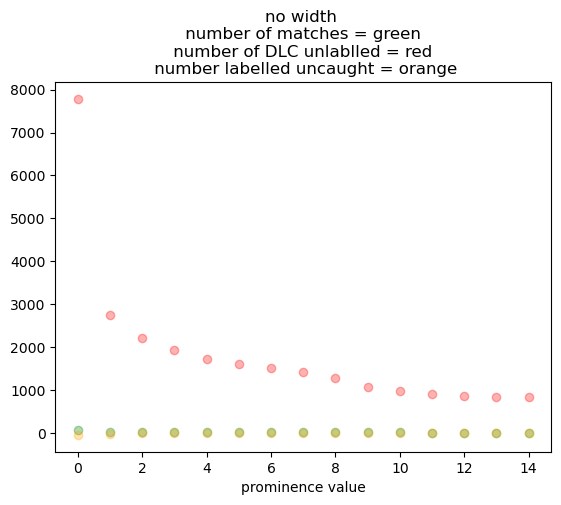

In [ ]:
##big PER, vs. DLC
DLC_peaks, properties = scipy.signal.find_peaks(difference, prominence = 7, width = 5)


##test if DLC and label find the same peaks

for prominence in range(10,25):
    DLC_peaks, properties = scipy.signal.find_peaks(difference, prominence = prominence) #, width = 5)
    print(prominence)

    variance = 5 #number of frames I'll allow as buffer (times two)
    count_matches = 0
    for lab_peak in frame_num_big_per:
        peak_allowance = [lab_peak+i for i in range(variance*-1, variance)]
        for peak in peak_allowance:
            if peak in DLC_peaks:
                # print('labelled peak', lab_peak)
                # print('found in DLC', peak)
                count_matches += 1
    print('prominence =', prominence)
    print("number of peaks that DLC and labelled both found:",count_matches)
    #print(len(frame_num_big_per))
    print('number of labelled PER that DLC missed:', len(frame_num_big_per) - count_matches)
    print('number of DLC peaks that are unlabelled:', len(DLC_peaks) - count_matches)
    plt.scatter(prominence, count_matches, color = 'green', alpha = .3)
    plt.scatter(prominence, (len(frame_num_big_per) - count_matches), color = 'orange', alpha = .3)
    plt.scatter(prominence, len(DLC_peaks) - count_matches, color = 'red', alpha = .3)
plt.title('no width \n number of matches = green \n number of DLC unlablled = red \n number labelled uncaught = orange')
#plt.ylim(0,40)
plt.xlabel("prominence value")
plt.show()

    #I want a condition for if none of the peaks are in frame_num to let me know
#I want to find # that match and the # that don't
    

width = 0
number of peaks that DLC and labelled both found: 19
number of labelled PER that DLC missed: 8
number of DLC peaks that are unlabelled: 985
width = 1
number of peaks that DLC and labelled both found: 16
number of labelled PER that DLC missed: 11
number of DLC peaks that are unlabelled: 823
width = 2
number of peaks that DLC and labelled both found: 10
number of labelled PER that DLC missed: 17
number of DLC peaks that are unlabelled: 403
width = 3
number of peaks that DLC and labelled both found: 8
number of labelled PER that DLC missed: 19
number of DLC peaks that are unlabelled: 273
width = 4
number of peaks that DLC and labelled both found: 6
number of labelled PER that DLC missed: 21
number of DLC peaks that are unlabelled: 208
width = 5
number of peaks that DLC and labelled both found: 5
number of labelled PER that DLC missed: 22
number of DLC peaks that are unlabelled: 171
width = 6
number of peaks that DLC and labelled both found: 5
number of labelled PER that DLC miss

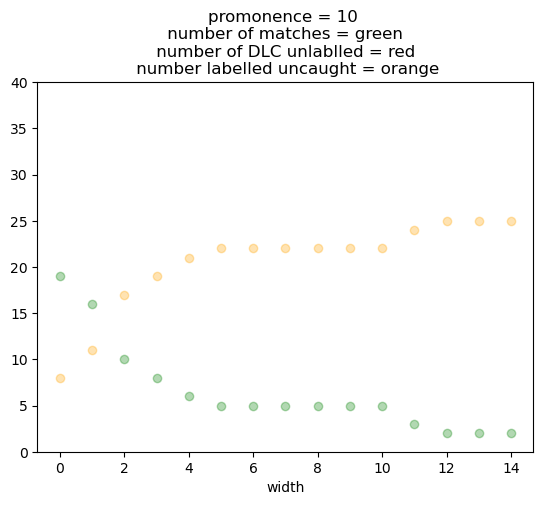

In [ ]:
##adjust width

for width in range(0,15):
    DLC_peaks, properties = scipy.signal.find_peaks(difference, prominence = 10, width = width)


    variance = 5 #number of frames I'll allow as buffer (times two)
    count_matches = 0
    for lab_peak in frame_num_big_per:
        peak_allowance = [lab_peak+i for i in range(variance*-1, variance)]
        for peak in peak_allowance:
            if peak in DLC_peaks:
                # print('labelled peak', lab_peak)
                # print('found in DLC', peak)
                count_matches += 1
    print('width =', width)
    print("number of peaks that DLC and labelled both found:",count_matches)
    #print(len(frame_num_big_per))
    print('number of labelled PER that DLC missed:', len(frame_num_big_per) - count_matches)
    print('number of DLC peaks that are unlabelled:', len(DLC_peaks) - count_matches)
    plt.scatter(width, count_matches, color = 'green', alpha = .3)
    plt.scatter(width, (len(frame_num_big_per) - count_matches), color = 'orange', alpha = .3)
    plt.scatter(width, len(DLC_peaks) - count_matches, color = 'red', alpha = .3)
plt.title('promonence = 10 \n number of matches = green \n number of DLC unlablled = red \n number labelled uncaught = orange')
plt.ylim(0,40)
plt.xlabel("width")
plt.show()


##prominence 10 and width 7 looks the best so far stillmissing a lot though

In [ ]:
print(DLC_peaks[0:10])

start = 120000
stop = 160000
plt.plot(raw_PER, alpha = .5, color = 'orange')
plt.plot(difference, alpha = .5, color = 'blue')
plt.scatter(DLC_peaks, np.ones(len(DLC_peaks))*55, color = 'blue', s = 10)
#plt.scatter(PER_peaks[0], np.ones(len(PER_peaks[0]))*54, color = 'red', s = 10)
#plt.scatter(PER_onsets, np.ones(len(PER_onsets))*56, color = 'black', s = 5)
plt.xlim(start,stop)

[  98  154 1203 1703 1805 1866 3583 3706 5424 7381]


NameError: name 'raw_PER' is not defined

In [ ]:
def get_smoothed_increase_index(data):
    """return indices where intensity increases from smoothed data (prev look for decrease, but with DLC look for increase)"""
    smoothed_intensity_decreases, smooothed_intensity_increases = get_smoothed_intensity_changes(data)
    smoothed_increase_index = []
    for column in range(len(smooothed_intensity_increases)):
        true_indices = np.where(smooothed_intensity_increases[column])
        smoothed_increase_index.append(np.squeeze(true_indices))
    return smoothed_increase_index

def get_smoothed_intensity_changes(data, smoothed_threshold = 1):
    """returns decreses in intensity and increases--combines with smoothing the means matrix in old version"""
    #smoothed_means_matrix = get_smoothed_means_matrix(data)
    smoothed_data = data[:-2]/3 + data[1:-1]/3 + data[2:]/3
    #to just see if previous value greater than next value of smoothened array--if the intensity drops
    smoothed_intensity_decreases = []
    smoothed_intensity_decreases = smoothed_data[:-1]>(smoothed_data[1:] + smoothed_threshold)
    smoothed_intensity_decreases = smoothed_intensity_decreases.T  #want to stack the other way
    
    #to just see if previous value smaller than next value of smoothened array--if the intensity increases
    smoothed_intensity_increases = []
    smoothed_intensity_increases = smoothed_data[:-1]<(smoothed_data[1:] + smoothed_threshold)
    smoothed_intensity_increases = smoothed_intensity_increases.T
    
    return smoothed_intensity_decreases, smoothed_intensity_increases

# def get_smoothed_means_matrix(data):
#     """inputs data and returns smoothed_means_matrix, smoothed_intensity_decreases, smooothed_intensity_increases"""
#     #call each column to perform the vectorized smoothing average over 3 frames to see if it changes intensity
#     ##Essentially take windowsize number of columns that are off by 1 until get to windowsize (in this case=3)
#     ##[begin:end:stride] end is exclusive so if you want to include item #n write n+1. -1 is second to last
#     ###NOTE: this will not give a value for the last 2 items (will shorten the array by 2) 
    
#     means_matrix = make_means_matrix(data)

#     smoothed_means_matrix = []
#     smoothed_means_matrix = means_matrix[:-2]/3 + means_matrix[1:-1]/3 + means_matrix[2:]/3
    
#     return smoothed_means_matrix

def get_PER_onset(peaks, smoothed_increase_index, PER_threshold = 50):
    """find onset of peaks from scipy peaks and intensity changes
    #onset is found by looking at the frames of peaks and looking for the smoothed_intensity change before that
    #for PER looking for a decrease, for light looking for an increase
    #I want to look at the peaks values of each column and compare them to the intensity changes of each column 
    threshold is max # of frames away from peak to look for onset
    OUTPUT is boolean matrix, if need the other matrix later then rewrite return to be all_onsets_matrix as well"""
    #smoothed_increase_index = get_smoothed_increase_index(data)
    
    onsets = []
    onset = [] 
    for i in range(len(peaks)):
                possible_onset = []
                new_possible_onset = []
                if len(smoothed_increase_index) > 1: #if it is not empty or one element
                    for j in range(len(smoothed_increase_index)):
                        if smoothed_increase_index[j] < peaks[i] and peaks[i] - smoothed_increase_index[j] < PER_threshold: 
                            #if the value is less than the peak and the onset isn't far from peak (here 50 frames)
                            possible_onset.append(smoothed_increase_index[j]) #make a list of possible onsets 
                        else:
                            possible_onset.append(0) #hopefully this will fix if the onsets and peaks don't match    
                    if i == 0: #if we are on the first element in peaks_PER
                        if possible_onset: #checks to make sure there is something in possible_onset
                            onset = int(np.median(possible_onset)) #needs to be int because it is an index
                    if i > 0: #if it is not the first element
                        #remove the possible onsets that are before the previous peak then take the first one
                        for onset_index in possible_onset:
                            if onset_index > peaks[i-1]:  
                                #I need to fix this in case it is not >. I think skip otherwise?
                                new_possible_onset.append(onset_index)
                                #onset = new_possible_onset[0]  
                                #might be better if this doesn't have to collect the first one everytime, 
                                # but it should work fine and eliminates the issue if the if statement is not true
                                onset = int(np.median(new_possible_onset)) #needs to be int because it is an index
                    #to prevent appending empty lists
                    if onset:  #this fails if onset is an empty list and will not append anything
                        onsets.append(onset)

In [ ]:
PER_onset_DLC = get_PER_onset(DLC_peaks, difference, PER_threshold = 50)

C:\Users\ashsm\AppData\Local\Temp\ipykernel_6248\1753272901.py:56: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if smoothed_increase_index[j] < peaks[i] and peaks[i] - smoothed_increase_index[j] < PER_threshold:


[111718 111959 112033 112172 112233 112605 112740 113046 113179 113299]


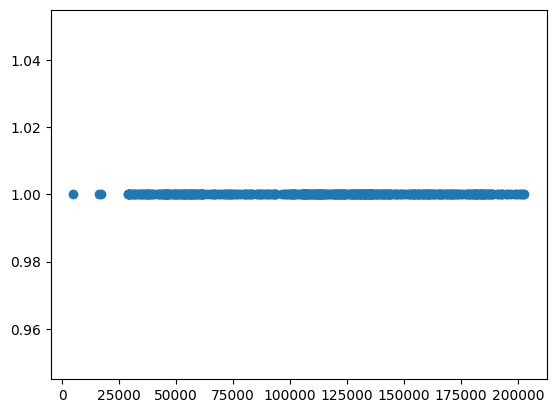

In [ ]:
plt.scatter(DLC_peaks, np.ones(len(DLC_peaks)))
print(DLC_peaks[210:220])

()
(202765,)
(202768,)
[ True  True  True ...  True  True  True]


 ...]

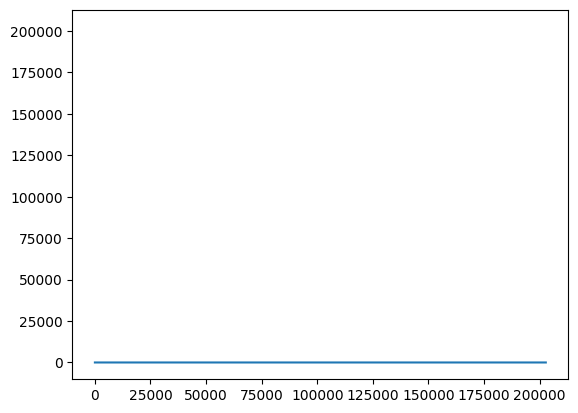

In [ ]:
print(np.shape(PER_onset_DLC))
changes_bool_decrease, changes_bool_increase = get_smoothed_intensity_changes(difference, smoothed_threshold = 1)
print(np.shape(changes_bool_increase))
print(np.shape(difference))

smoothed_increase_index = np.where(changes_bool_increase==True)
print(changes_bool_increase)
plt.plot(changes_bool_increase)
plt.plot(smoothed_increase_index)
#plt.scatter(smoothed_increase_index, np.ones(len(smoothed_increase_index)))

In [ ]:
DLC_PER_onset = get_PER_onset(DLC_peaks, smoothed_increase_index, PER_threshold = 50)

In [ ]:
print(np.shape(DLC_PER_onset))

()
